# Exercise 02 : Bar

### analyze only the users and not the admins
### the fontsize and the figsize are still the same
### night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
### choose a palette that you really enjoy, you do not have to replicate it from the graph above


commit_time
night        35
morning      35
afternoon    35
evening      35
dtype: int64


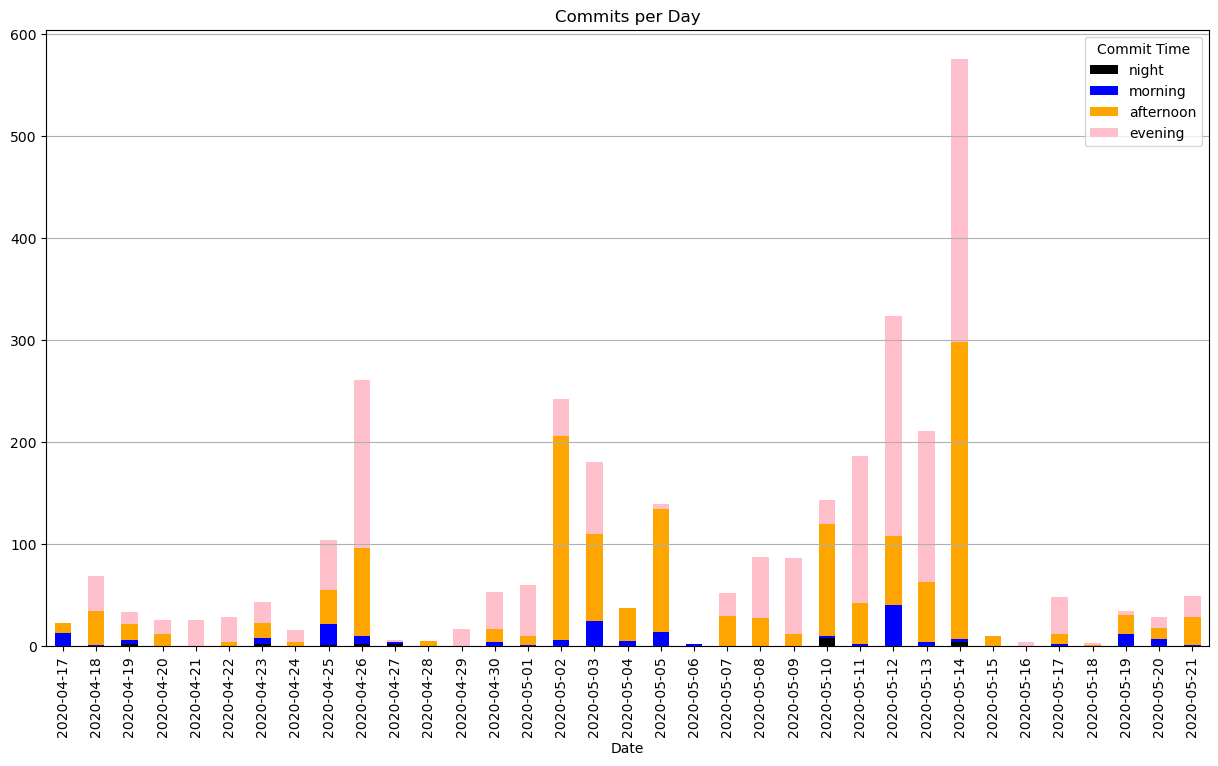

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

connection = sqlite3.connect('../data/logs.db')
cursor = connection.cursor()
cursor.execute("ATTACH DATABASE '../data/checking-logs.sqlite' AS logs")
connection.commit()

checker_query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
timestamp = pd.io.sql.read_sql(checker_query, connection)

timestamp_df = pd.DataFrame(timestamp)
timestamp_df['timestamp'] = pd.to_datetime(timestamp_df['timestamp'])
timestamp_df['commit_date'] = timestamp_df['timestamp'].dt.date
timestamp_df['commit_hour'] = timestamp_df['timestamp'].dt.hour

bin = [0, 3, 9, 16, 23]
label = ['night', 'morning', 'afternoon', 'evening']
timestamp_df['commit_time'] = pd.cut(timestamp_df['commit_hour'], bin, labels=label, include_lowest=True)

pivot_df = timestamp_df.pivot_table(index='commit_date', columns='commit_time', values='uid', aggfunc='count', fill_value=0, observed=False)
df = pd.DataFrame(pivot_df)

connection.close()

pivot_df.plot(kind='bar', stacked=True, color=['black', 'blue', 'orange', 'pink'], figsize=(15, 8))

plt.xlabel('Date')
plt.title('Commits per Day')
plt.legend(title='Commit Time')
plt.grid(axis='y')
plt.show()

When do Users  usually commit the labs: in the night, morning, afternoon, or evening?

They usually commit in the evening

Which day has:
- the most number of commits
- and at the same time, the number of commits in the evening is higher than in the afternoon?

- 14-05-2020 has the most number of commits
- 12-05-2020 is the day with the most commmits where eveninig is higher than afternoon